In [64]:
from sentence_transformers import SentenceTransformer

In [65]:
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import HTML

In [66]:
%run 4_EDA.ipynb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155344 entries, 0 to 155343
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Investors                       155344 non-null  object
 1   Primary Contact                 155342 non-null  object
 2   Description                     155344 non-null  object
 3   Geography                       155344 non-null  object
 4   Preferred Industry              155330 non-null  object
 5   Preferred Investment Type       154764 non-null  object
 6   Primary Investor Type           154680 non-null  object
 7   geography_tags                  155344 non-null

In [67]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [82]:
geography_tags_list

geography_tags
                                                                                                                                                                                                                                                                                                       112339
united states                                                                                                                                                                                                                                                                                            7106
europe                                                                                                                                                                                                                                                                                                   3933
canada                                                                         

In [95]:
geography_tags_list = geography_tags_list[geography_tags_list>=3]
geography_tags_list

geography_tags
                   112339
united states        7106
europe               3933
canada               2146
north america        1484
                    ...  
comoros                 3
somalia                 3
leasing                 3
debt                    3
venture capital         3
Name: count, Length: 375, dtype: int64

In [96]:
geography_embeddings = model.encode(geography_tags_list.index.to_list())

In [97]:
geography_embeddings

array([[-0.11883836,  0.04829866, -0.00254808, ...,  0.12640947,
         0.04654906, -0.01571728],
       [ 0.06430633, -0.00233025,  0.00298104, ..., -0.00998681,
         0.00754462,  0.02378987],
       [ 0.07035641,  0.06353405, -0.03296059, ...,  0.02717287,
        -0.00712428,  0.0315084 ],
       ...,
       [ 0.00024783,  0.00170734,  0.01498767, ..., -0.0586244 ,
        -0.00537967, -0.07741988],
       [-0.05865506,  0.0534432 , -0.06228608, ..., -0.10040589,
        -0.00551384, -0.05171675],
       [ 0.05136243, -0.04624943,  0.0186265 , ..., -0.08323827,
         0.05829374, -0.05005372]], dtype=float32)

In [98]:
import umap.umap_ as umap

#Reduce dimensions using umap (good for large dataset)
umap_model = umap.UMAP(n_components=2, random_state=42)
geography_embeddings_umap = umap_model.fit_transform(geography_embeddings)
geography_embeddings_umap

# Combine geography_tags_list.index and geography_embeddings_umap into a DataFrame
geography_embeddings_umap_df = pd.DataFrame({
    'Geography': geography_tags_list.index,
    'Dimension_1': [embedding[0] for embedding in geography_embeddings_umap],
    'Dimension_2': [embedding[1] for embedding in geography_embeddings_umap]
})
geography_embeddings_umap_df

geography_embeddings_umap_df

C:\Users\brian\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



,Geography,Dimension_1,Dimension_2
0,,7.516799,6.512045
1,united states,10.031570,5.905298
2,europe,12.280464,7.777314
3,canada,10.332307,5.521811
4,north america,10.993505,5.175611
...,...,...,...
370,comoros,11.814503,6.287049
371,somalia,9.202439,10.732203
372,leasing,7.145622,6.831632
373,debt,7.136538,6.779355


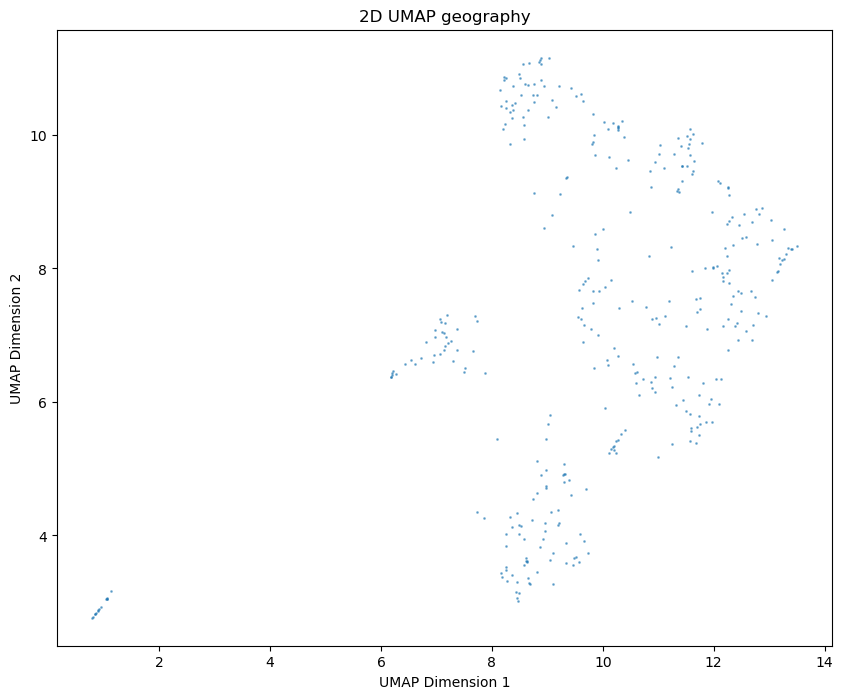

In [99]:
# fix. set the color 86160

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(geography_embeddings_umap_df['Dimension_1'], geography_embeddings_umap_df['Dimension_2'], s=1, alpha=0.5)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('2D UMAP geography')
plt.show()

# investment_type

In [108]:
preferred_investment_type_tags_list

preferred_investment_type_tags
merger/acquisition                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   72596
0                                                                                                                                                                                                                                                                                                             

In [109]:
preferred_investment_type_tags_list = preferred_investment_type_tags_list[preferred_investment_type_tags_list>=2]
preferred_investment_type_tags_list

preferred_investment_type_tags
merger/acquisition         72596
0                          29986
early stage vc             22533
seed round                 19403
buyout/lbo                 18752
                           ...  
pharmaceuticals                2
financial software             2
other consumer durables        2
utility                        2
biotechnology                  2
Name: count, Length: 169, dtype: int64

C:\Users\brian\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



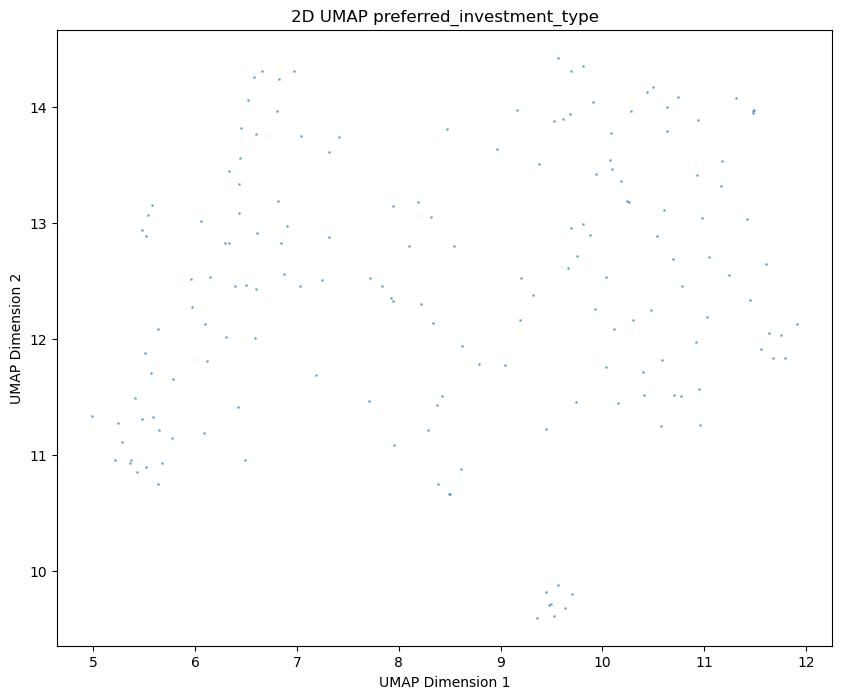

In [110]:
investment_type_embeddings = model.encode(preferred_investment_type_tags_list.index.to_list())

umap_model = umap.UMAP(n_components=2, random_state=42)
investment_type_embeddings_umap = umap_model.fit_transform(investment_type_embeddings)

investment_type_embeddings_umap_df = pd.DataFrame({
    'Geography': preferred_investment_type_tags_list.index,
    'Dimension_1': [embedding[0] for embedding in investment_type_embeddings_umap],
    'Dimension_2': [embedding[1] for embedding in investment_type_embeddings_umap]
})

plt.figure(figsize=(10, 8))
plt.scatter(investment_type_embeddings_umap_df['Dimension_1'], investment_type_embeddings_umap_df['Dimension_2'], s=1, alpha=0.5)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('2D UMAP preferred_investment_type')
plt.show()

In [127]:
investment_type_embeddings = model.encode(preferred_investment_type_tags_list.index.to_list())

umap_model = umap.UMAP(n_components=3, random_state=42)
investment_type_embeddings_umap = umap_model.fit_transform(investment_type_embeddings)

investment_type_embeddings_umap_df = pd.DataFrame({
    'Investment': preferred_investment_type_tags_list.index,
    'Dimension_1': [embedding[0] for embedding in investment_type_embeddings_umap],
    'Dimension_2': [embedding[1] for embedding in investment_type_embeddings_umap],
    'Dimension_3': [embedding[2] for embedding in investment_type_embeddings_umap],
    'Count': preferred_investment_type_tags_list
})



fig = px.scatter_3d(investment_type_embeddings_umap_df, x="Dimension_1", y="Dimension_2", z="Dimension_3",hover_data='Investment'
# , color="species",size='petal_length'
                    )
html_str = fig.to_html()
with open('Investment_umap_3d.html', 'w') as f:
    f.write(html_str)

fig = px.scatter_3d(investment_type_embeddings_umap_df, x="Dimension_1", y="Dimension_2", z="Dimension_3",hover_data='Investment',size='Count'
# , color="species",size='petal_length'
                    )
html_str = fig.to_html()
with open('Investment_umap_3d_size.html', 'w') as f:
    f.write(html_str)

C:\Users\brian\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



# preferred_industry

In [119]:
preferred_industry_tags_list = preferred_industry_tags_list[preferred_industry_tags_list>=2]
preferred_industry_tags_list

preferred_industry_tags
0                                       57277
software                                22851
commercial services                     13425
commercial products                      7876
other business products and services     5174
                                        ...  
thailand                                    2
sweden                                      2
japan                                       2
middle east                                 2
texas                                       2
Name: count, Length: 286, dtype: int64

C:\Users\brian\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



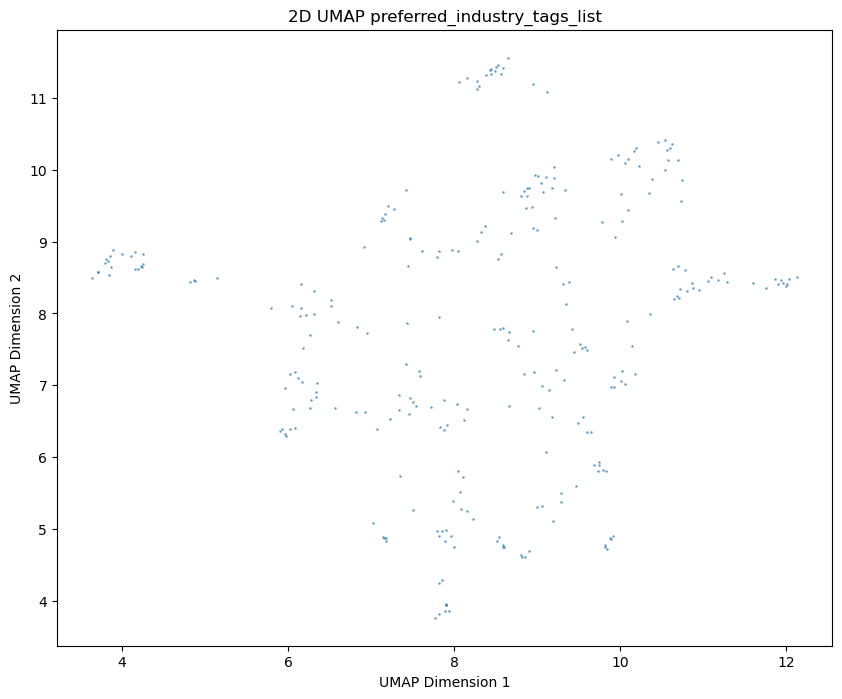

In [120]:
industry_embeddings = model.encode(preferred_industry_tags_list.index.to_list())
umap_model = umap.UMAP(n_components=2, random_state=42)
industry_embeddings_umap = umap_model.fit_transform(industry_embeddings)
industry_embeddings_umap_df = pd.DataFrame({
    'Geography': preferred_industry_tags_list.index,
    'Dimension_1': [embedding[0] for embedding in industry_embeddings_umap],
    'Dimension_2': [embedding[1] for embedding in industry_embeddings_umap]
})

plt.figure(figsize=(10, 8))
plt.scatter(industry_embeddings_umap_df['Dimension_1'], industry_embeddings_umap_df['Dimension_2'], s=1, alpha=0.5)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('2D UMAP preferred_industry_tags_list')
plt.show()

In [121]:
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import HTML

In [125]:
industry_embeddings = model.encode(preferred_industry_tags_list.index.to_list())
umap_model = umap.UMAP(n_components=3, random_state=42)
industry_embeddings_umap = umap_model.fit_transform(industry_embeddings)
industry_embeddings_umap_df = pd.DataFrame({
    'Industry': preferred_industry_tags_list.index,
    'Dimension_1': [embedding[0] for embedding in industry_embeddings_umap],
    'Dimension_2': [embedding[1] for embedding in industry_embeddings_umap],
    'Dimension_3': [embedding[2] for embedding in industry_embeddings_umap],
    'Count': preferred_industry_tags_list
})



fig = px.scatter_3d(industry_embeddings_umap_df, x="Dimension_1", y="Dimension_2", z="Dimension_3",hover_data='Industry'
# , color="species",size='petal_length'
                    )
html_str = fig.to_html()
with open('industry_umap_3d.html', 'w') as f:
    f.write(html_str)

fig = px.scatter_3d(industry_embeddings_umap_df, x="Dimension_1", y="Dimension_2", z="Dimension_3",hover_data='Industry',size='Count'
# , color="species",size='petal_length'
                    )
html_str = fig.to_html()
with open('industry_umap_3d_size.html', 'w') as f:
    f.write(html_str)

C:\Users\brian\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [123]:
# df_s = drop_df.sample(100) 
# #df_s2 = df_s['preferred_investment_type_tags'].explode().str.get_dummies().groupby(level=0).sum().astype(bool)


# cols = ['preferred_investment_type_tags', 'geography_tags','preferred_industry_tags']  # add more columns as needed
# df_s3 = df_s.copy()
# for col in cols:
#     dummies = df_s3[col].explode().str.get_dummies().groupby(level=0).sum().astype(bool)
#     dummies = dummies.add_prefix(f"{col}_")
#     df_s3 = df_s3.join(dummies)
#     df_s3.drop(col, axis=1, inplace=True)
# df_s3